In [1]:
from keras.layers import Input, Embedding, GlobalAveragePooling1D, Dense, Flatten
from keras.models import Model
from keras.optimizers import Adam
from emotions_tokens import additional_tokens
from metrics import cosine_similarity_loss, all_metrics
from load_data import load_data, load_tokenizer
import numpy as np

2024-06-18 16:53:32.489921: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-18 16:53:32.489982: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-18 16:53:32.492677: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-06-18 16:53:32.503489: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-06-18 16:53:35.875757: I exter

In [50]:


# Example sentences and their embeddings
sentences = [
    "I love this!", "I adore this!",
    "This is terrible...", "This is awful...",
    "This is amazing!", "This is incredible!",
    "I hate it!", "I detest it!",
    "What a wonderful day!", "What a splendid day!",
    "This is dreadful...", "This is horrible...",
    "Such a beautiful place!", "Such a gorgeous place!",
    "I can't stand it!", "I loathe it!",
    "I'm so happy!", "I'm so delighted!",
    "What a nightmarish day!", "What a terrible day!",
    "This is fantastic!", "This is fabulous!",
    "What an idiot!", "What a moron!",
    "What a lovely evening!", "What a delightful evening!",
    "You made me mad!", "You made me angry!",
    "Such a nice location!", "Such a pleasant location!",
    "You don't know anything!", "You know nothing!",
    ":) :) :)", ":D :D :D",
    ":( :( :(", ":'( :'( :'(",
]

labels = [
    0, 0,  # "I love this!", "I adore this!"
    1, 1,  # "This is terrible...", "This is awful..."
    0, 0,  # "This is amazing!", "This is incredible!"
    1, 1,  # "I hate it!", "I detest it!"
    0, 0,  # "What a wonderful day!", "What a splendid day!"
    1, 1,  # "This is dreadful...", "This is horrible..."
    0, 0,  # "Such a beautiful place!", "Such a gorgeous place!"
    1, 1,  # "I can't stand it!", "I loathe it!"
    0, 0,  # "I'm so happy!", "I'm so delighted!"
    1, 1,  # "What a nightmarish day!", "What a terrible day!"
    0, 0,  # "This is fantastic!", "This is fabulous!"
    1, 1,  # "What an idiot!", "What a moron!"
    0, 0,  # "What a lovely evening!", "What a delightful evening!"
    1, 1,  # "You made me mad!", "You made me angry!"
    0, 0,   # "Such a nice location!", "Such a pleasant location!"
    1, 1,   # "You don't know anything!", "You know nothing!"
    0, 0,  # ":) :) :)", ":D :D :D"
    1, 1,  # ":( :( :(", ":'( :'( :'("
]


In [51]:
tokenizer = load_tokenizer()

max_sequence_length = 200
embedding_dim = 32

X_train, y_train, X_test, y_test = load_data(tokenizer, max_sequence_length)

In [52]:
def build_model(vocab_size, embedding_dim, input_length):
    inputs = Input(shape=(input_length,))
    x = Embedding(input_dim=vocab_size, output_dim=embedding_dim)(inputs)
    x = GlobalAveragePooling1D()(x)
    model = Model(inputs, x)
    return model

# Assuming you have already tokenized your text data and have X_train and y_train
vocab_size = tokenizer.vocab_size + len(additional_tokens)

model = build_model(vocab_size, embedding_dim, max_sequence_length)

model.compile(optimizer=Adam(0.01), loss=cosine_similarity_loss, metrics=all_metrics)
                    
# Print model summary
model.summary()


Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 200)]             0         
                                                                 
 embedding_4 (Embedding)     (None, 200, 32)           933888    
                                                                 
 global_average_pooling1d_4  (None, 32)                0         
  (GlobalAveragePooling1D)                                       
                                                                 
Total params: 933888 (3.56 MB)
Trainable params: 933888 (3.56 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [60]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input

# Assuming `tokenizer`, `sentences`, `labels`, `max_sequence_length`, and `all_metrics` are defined elsewhere

# Define a simple model for demonstration purposes
model = Sequential([
    Input(shape=(max_sequence_length,)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(1)  # Assuming a regression task for cosine similarity
])

# Define a cosine similarity loss function
def cosine_similarity_loss(y_true, y_pred):
    y_true = tf.cast(y_true, tf.float32)
    y_pred = tf.cast(y_pred, tf.float32)
    return tf.losses.cosine_similarity(y_true, y_pred)

# Define a dummy metric for demonstration purposes
def dummy_metric(y_true, y_pred):
    return tf.reduce_mean(y_pred)

# Compile the model
model.compile(optimizer=Adam(learning_rate=1e-3), metrics=all_metrics, loss=cosine_similarity_loss)

# Tokenize the sentences
sequences = tokenizer(sentences, 
                      padding='max_length', truncation=True, 
                      max_length=max_sequence_length, return_tensors='np', 
                      return_token_type_ids=False, 
                      return_attention_mask=False)

# Extract the input IDs and convert to numpy array
sequences = sequences['input_ids']
sequences = np.array(sequences, dtype=np.float32)  # Ensure sequences are float32

# Ensure labels are a numpy array and of the correct type
labels = np.array(labels, dtype=np.float32)  # Ensure labels are float32

# Print types and shapes to confirm
print(type(sequences))  # Should print: <class 'numpy.ndarray'>
print(type(labels))     # Should print: <class 'numpy.ndarray'>
print(sequences.dtype)  # Should print: float32
print(labels.dtype)     # Should print: float32
print(sequences.shape, labels.shape)  # Should print: (36, 200) (36,)

# Fit the model
model.fit(sequences, labels, epochs=10, batch_size=32)


<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
float32
float32
(36, 200) (36,)
Epoch 1/10


ValueError: in user code:

    File "/home/sebdg/anaconda3/envs/tf3/lib/python3.10/site-packages/keras/src/engine/training.py", line 1401, in train_function  *
        return step_function(self, iterator)
    File "/home/sebdg/anaconda3/envs/tf3/lib/python3.10/site-packages/keras/src/engine/training.py", line 1384, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/home/sebdg/anaconda3/envs/tf3/lib/python3.10/site-packages/keras/src/engine/training.py", line 1373, in run_step  **
        outputs = model.train_step(data)
    File "/home/sebdg/anaconda3/envs/tf3/lib/python3.10/site-packages/keras/src/engine/training.py", line 1155, in train_step
        return self.compute_metrics(x, y, y_pred, sample_weight)
    File "/home/sebdg/anaconda3/envs/tf3/lib/python3.10/site-packages/keras/src/engine/training.py", line 1249, in compute_metrics
        self.compiled_metrics.update_state(y, y_pred, sample_weight)
    File "/home/sebdg/anaconda3/envs/tf3/lib/python3.10/site-packages/keras/src/engine/compile_utils.py", line 620, in update_state
        metric_obj.update_state(y_t, y_p, sample_weight=mask)
    File "/home/sebdg/anaconda3/envs/tf3/lib/python3.10/site-packages/keras/src/utils/metrics_utils.py", line 77, in decorated
        result = update_state_fn(*args, **kwargs)
    File "/home/sebdg/anaconda3/envs/tf3/lib/python3.10/site-packages/keras/src/metrics/base_metric.py", line 140, in update_state_fn
        return ag_update_state(*args, **kwargs)
    File "/home/sebdg/anaconda3/envs/tf3/lib/python3.10/site-packages/keras/src/metrics/regression_metrics.py", line 551, in update_state  **
        self.sum.assign_add(tf.reduce_sum(weighted_y_true, axis=0))

    ValueError: Dimension 0 in both shapes must be equal, but are 32 and 1. Shapes are [32] and [1]. for '{{node AssignAddVariableOp_8}} = AssignAddVariableOp[dtype=DT_FLOAT](AssignAddVariableOp_8/resource, Sum_8)' with input shapes: [], [1].


In [49]:

# Extract the input IDs and convert to numpy array
sequences = sequences['input_ids']
sequences = np.array(sequences, dtype=np.float32)  # Ensure sequences are float32

# Ensure labels are a numpy array and of the correct type
labels = np.array(labels, dtype=np.float32)  # Ensure labels are float32

# Print types and shapes to confirm
print(type(sequences))  # Should print: <class 'numpy.ndarray'>
print(type(labels))     # Should print: <class 'numpy.ndarray'>
print(sequences.dtype)  # Should print: float32
print(labels.dtype)     # Should print: float32
print(sequences.shape, labels.shape)  # Should print: (36, 200) (36,)

# Fit the model
model.fit(sequences, labels, epochs=10, batch_size=32)

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [17]:
from sklearn.metrics.pairwise import cosine_similarity

# print a pair of embeddings
embeddings = model.predict(X)
for i in range(0, len(embeddings), 2):
    # print(embeddings[i])
    # print(embeddings[i+1])
    similarity = cosine_similarity([embeddings[i]], [embeddings[i+1]])
    print(i, sentences[i], sentences[i+1])
    print(similarity)

# compute the cosine similarity between the two embeddings


2/2 [==============================] - 0s 5ms/step
0 I love this! I adore this!
[[0.9999637]]
2 This is terrible... This is awful...
[[0.99997497]]
4 This is amazing! This is incredible!
[[0.999981]]
6 I hate it! I detest it!
[[0.99996126]]
8 What a wonderful day! What a splendid day!
[[0.9999717]]
10 This is dreadful... This is horrible...
[[0.9999684]]
12 Such a beautiful place! Such a gorgeous place!
[[0.99997336]]
14 I can't stand it! I loathe it!
[[0.99993426]]
16 I'm so happy! I'm so delighted!
[[0.9999811]]
18 What a nightmarish day! What a terrible day!
[[0.9999544]]
20 This is fantastic! This is fabulous!
[[0.9999713]]
22 What an idiot! What a moron!
[[0.99994874]]
24 What a lovely evening! What a delightful evening!
[[0.9999769]]
26 You made me mad! You made me angry!
[[0.9999728]]
28 Such a nice location! Such a pleasant location!
[[0.9999773]]
30 You don't know anything! You know nothing!
[[0.99993736]]
32 :) :) :) :D :D :D
[[1.]]
34 :( :( :( :'( :'( :'(
[[1.]]


In [18]:
first = 0
second = 6
similarity = cosine_similarity([embeddings[first]], [embeddings[second]])
print(sentences[first], sentences[second])
print(similarity)


I love this! I hate it!
[[0.9999531]]


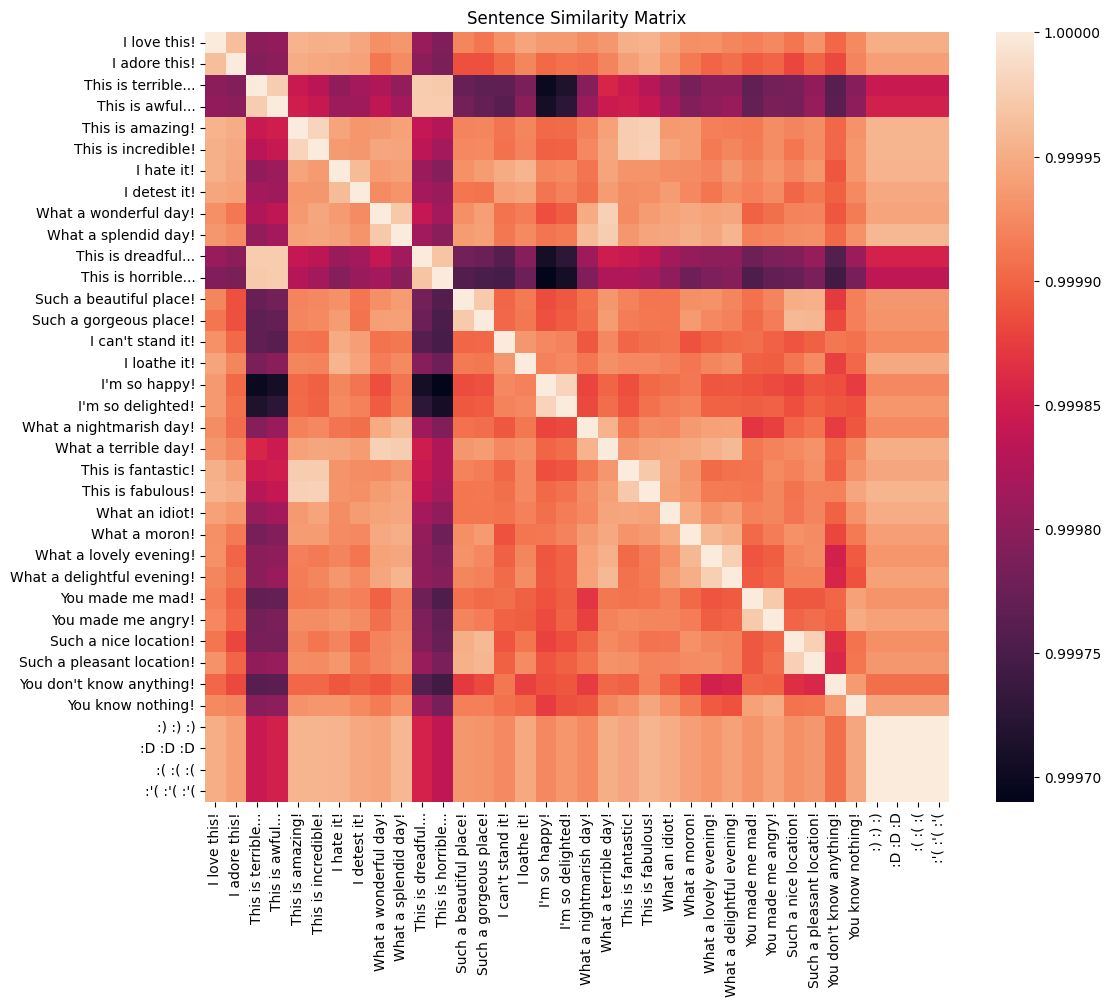

In [22]:
# plot a confusion matrix 
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

similarity_matrix = cosine_similarity(embeddings)

# Plot the similarity matrix using seaborn
plt.figure(figsize=(12, 10))
sns.heatmap(similarity_matrix, xticklabels=sentences, yticklabels=sentences)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.title('Sentence Similarity Matrix')
plt.show()